<a href="https://colab.research.google.com/github/KacperKaszuba0608/ML_projects/blob/main/Stochastic_Gradient_Descent_on_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Guided Project: Stochastic Gradient Descent on Linear Regression</h1></center>

Imagine you like to go to the gym. However, you get to the gym and it is so crowded and you must wait to use the machines you want. Luckily, you are a machine learning expert and you have all skills and knowledge to build the predict model witch will help you find the best time to go to the gym.

The dataset is called "Crowdedness at the Campus Gym", which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.

It contains the following informations:
* `number_people`: this is the number of people at the gym at each observation. This will be our target variable or label.
* `date`: a string value with the specific date and time information.
* `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
* `dayofweek`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
* `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
* `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
* `temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.
* `is_start_of_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
* `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
* `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
* `hour`: an integer (int) for the hour of the day from 0 to 23.

# Reading in Data and Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

gym = pd.read_csv('https://dq-content.s3.amazonaws.com/750/crowdness_gym_data.csv')
gym.shape

(62184, 11)

# EDA and Cleaning the Data

In [2]:
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


About the dataset, we have about 62000 rows and 11 columns, which almost all contains numerical values except date column. The `info` method doesn't show us missing values, but the `describe` give us a closer look at some features. Everything looks good right now. Let's check the distribution of continuous features.

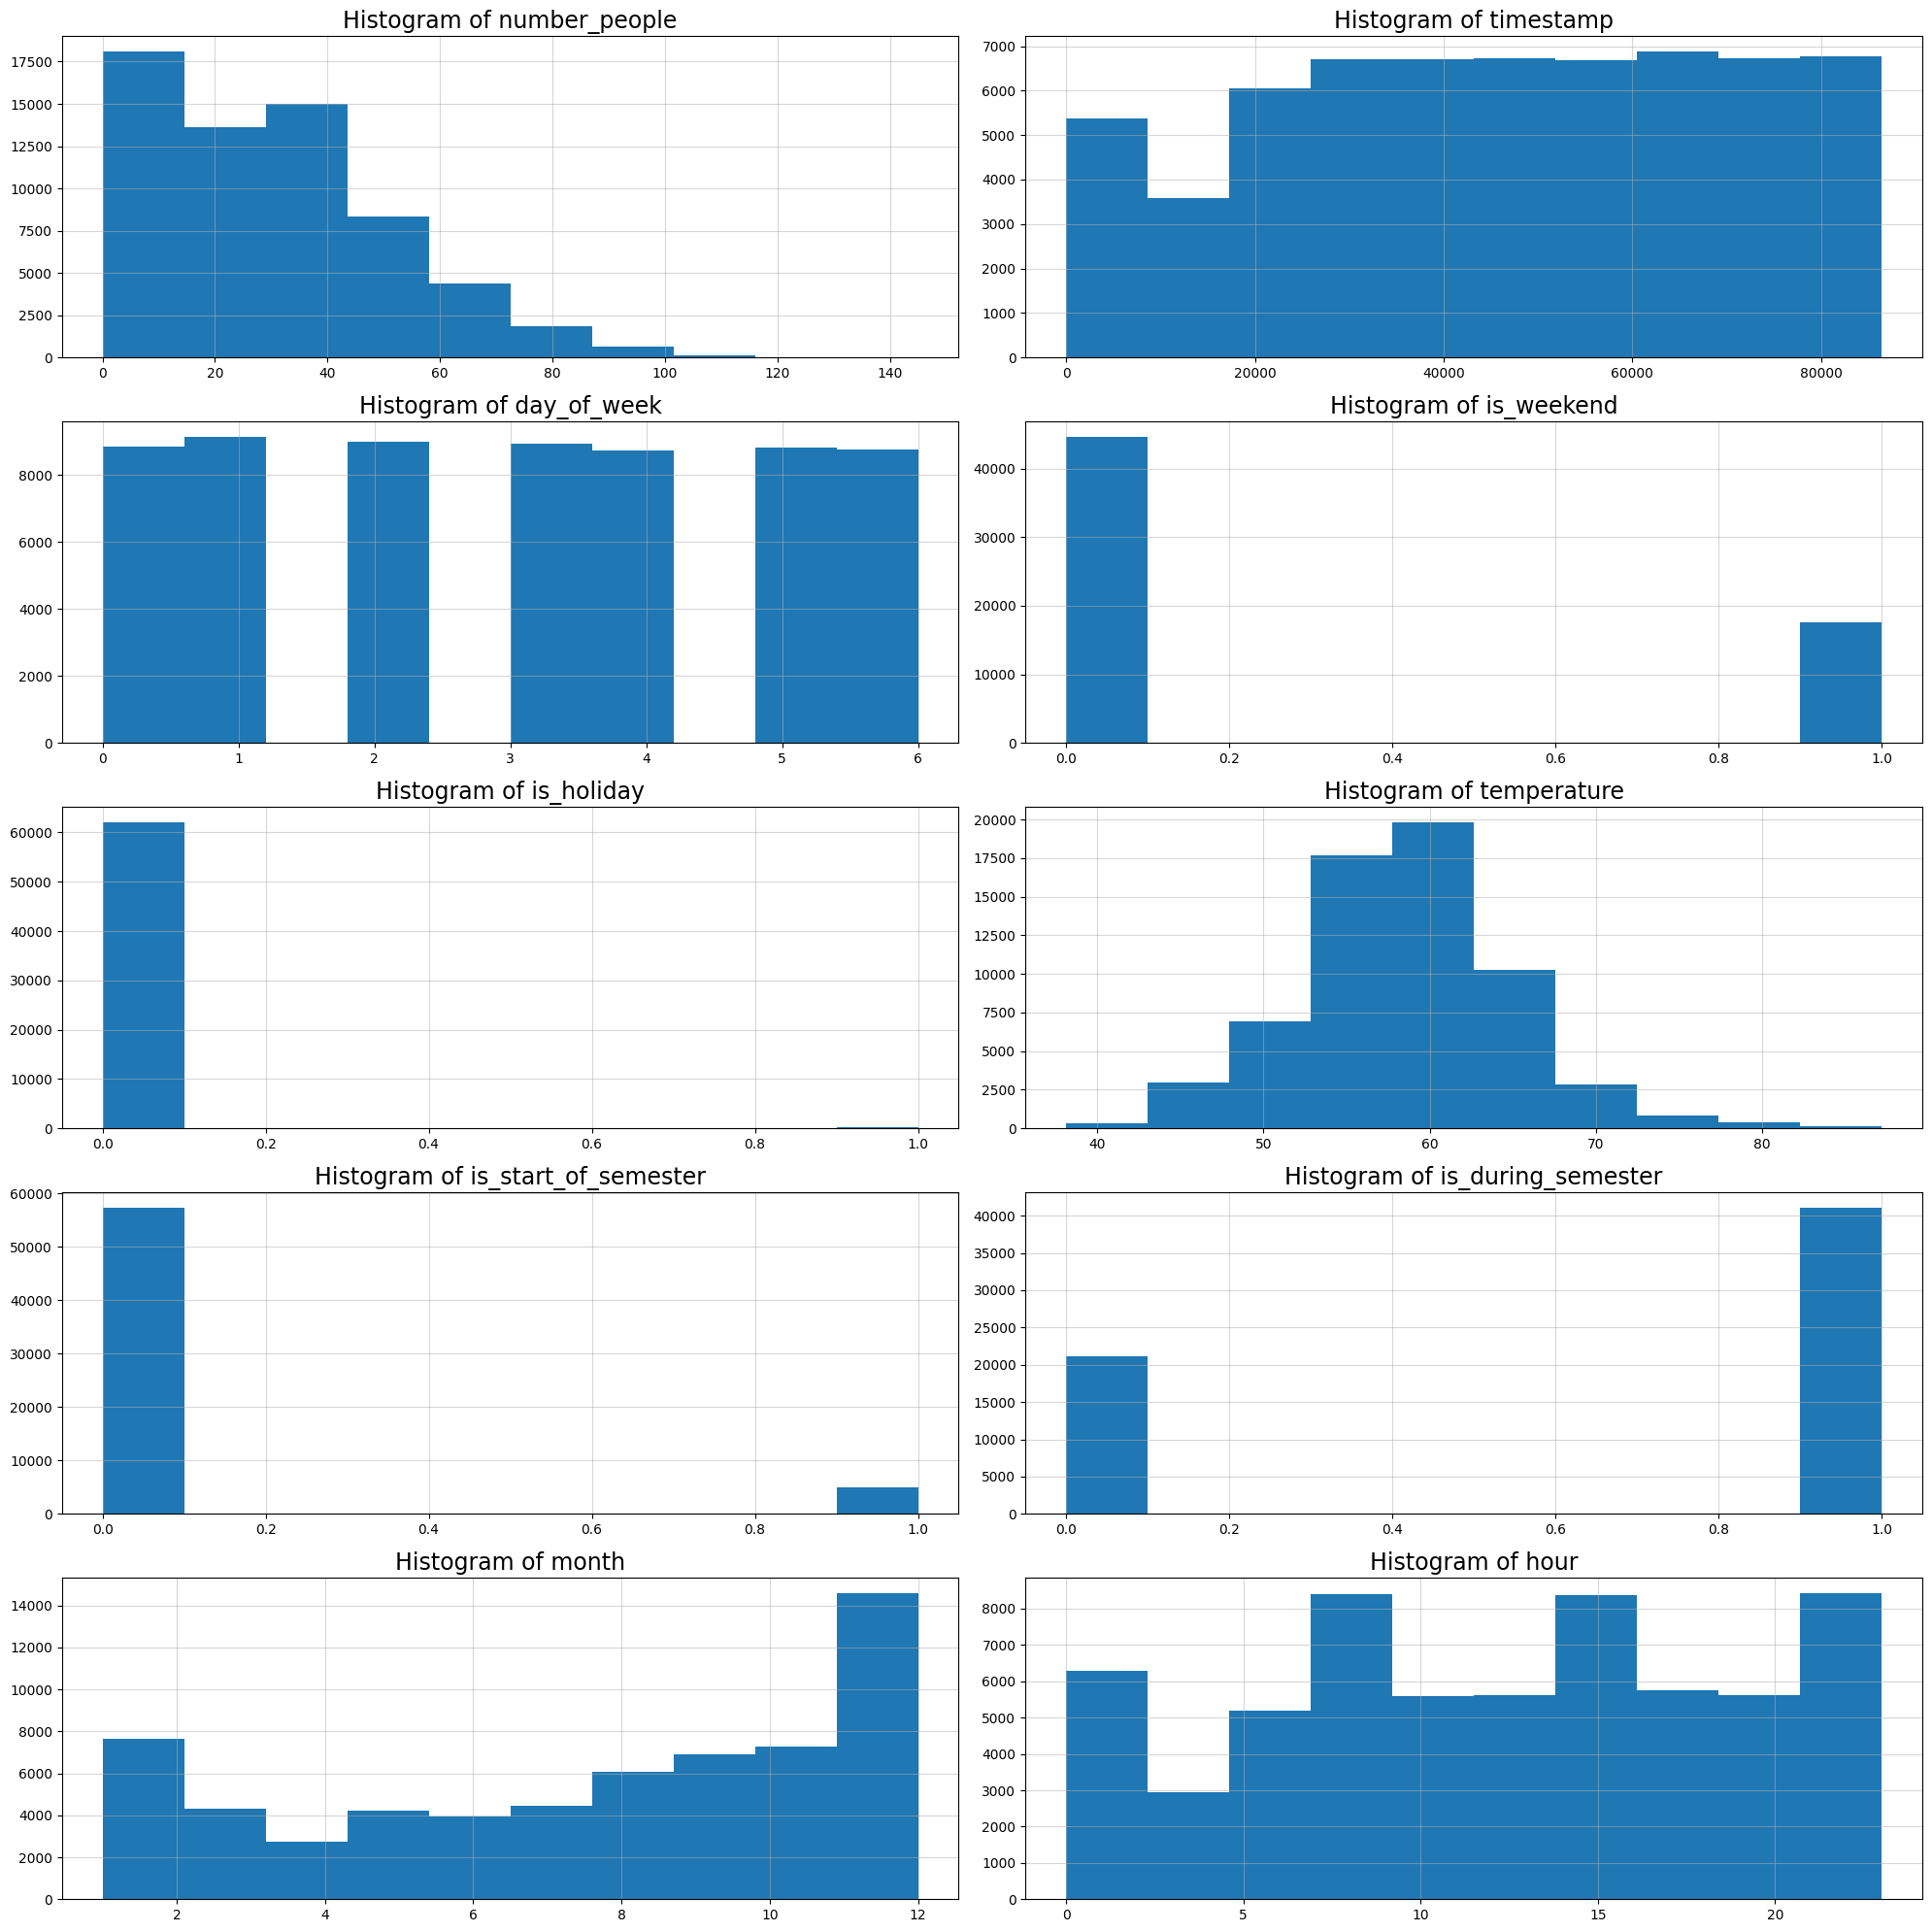

In [5]:
cols = gym.drop('date', axis=1).columns

fig = plt.figure(figsize=(20,20))
for n, col in enumerate(cols):
    ax = fig.add_subplot(5,2,n+1)
    gym[[col]].hist(ax=ax)
    ax.set_title(f'Histogram of {col}', size=17)
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.show()

After a closer analysis of the feature histograms, we can say that the columns `is_holiday` and `is_start_of_semester` are almost one-sided (means contains almost one value), so we should remove them from the considered predictors, but let's check the correlations first.

Histograms of `day_of_week` don't have a significant impact because the number of occurrences is almost the same for each day of the week. When analysing the histogram of `timestamp` we can say the same as above and we can add that probably `timestamp` and `hour` are strongly correlated and we should remove the column `timestamp` because of its characteristic: very high values.

Histogram of target is little bit skewed, so we probably should use some transform.

The `temperature` histogram has a distribution closer to normal. `Month` and `hour` histograms show some patterns:
* we have more records in winter months;
* we can highlight some hours when the gym is crowded (12, 15 and night hours from 21 to 3).

Let's check the correlations between features and target.

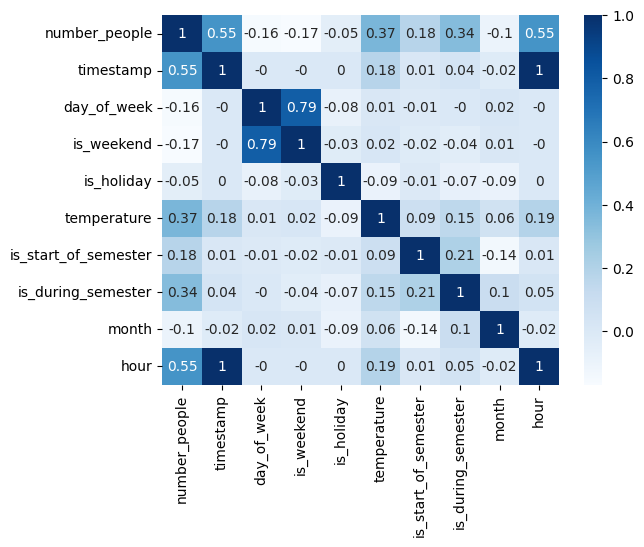

In [6]:
corr = gym.drop('date', axis=1).corr()

sns.heatmap(round(corr,2), annot=True, cmap='Blues')
plt.show()

The histogram above tells us what we suspected. `timestamp` and `hour` are strongly correlated with each other, and also with the target, so we can remove `timestamp` from the dataset. `is_holiday` and `month` are very weakly correlated with the target, so they are not suitable for analysis.

We can higlight three the most correlated features with target:
1. `hour`: 0.55
2. `temperature`: 0.37
3. `is_during_semester`: 0.34

We see more than that 3 features:
* `day_of_week`: -0.16
* `is_weekend`: -0.17
* `is_start_of_semester`: 0.18

In [7]:
gym_clean = gym.drop(['timestamp', 'is_holiday', 'month', 'date'], axis=1)
gym_clean.head()

,number_people,day_of_week,is_weekend,temperature,is_start_of_semester,is_during_semester,hour
0,37,4,0,71.76,0,0,17
1,45,4,0,71.76,0,0,17
2,40,4,0,71.76,0,0,17
3,44,4,0,71.76,0,0,17
4,45,4,0,71.76,0,0,17


# Preparing to Build the 1st Model

In [8]:
# Model 1

x = gym_clean.drop(['number_people'], axis=1)
y = gym_clean['number_people']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=782)

# building model
sgdr = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber',
                    penalty='elasticnet', random_state = 252)
sgdr.fit(X_train, y_train)

y_pred = sgdr.predict(X_test)

# Measure the Performance of the 1st Model

In [9]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

m1 = pd.DataFrame({'MSE':mse, 'MAE':mae, 'R2':r2}, index=['model1'])

As we see the measures of the performance are bad. We will construct 2nd model with standarization.

# Preparing to Build the 2nd Model

In [10]:
# Model 2

gym_modif = gym_clean.copy()

x = gym_modif.drop(['number_people'], axis=1)
y = gym_modif['number_people']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=782)

# scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# building model
sgdr = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber',
                    penalty='elasticnet', random_state = 252)
sgdr.fit(X_train_scaled, y_train)

y_pred = sgdr.predict(X_test_scaled)

# Measure the Performance of the 2nd Model

In [11]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

m2 = pd.DataFrame({'MSE':mse, 'MAE':mae, 'R2':r2}, index=['model 2'])
m2

,MSE,MAE,R2
model 2,266.84419,12.435186,0.479726


# Visualize the Results

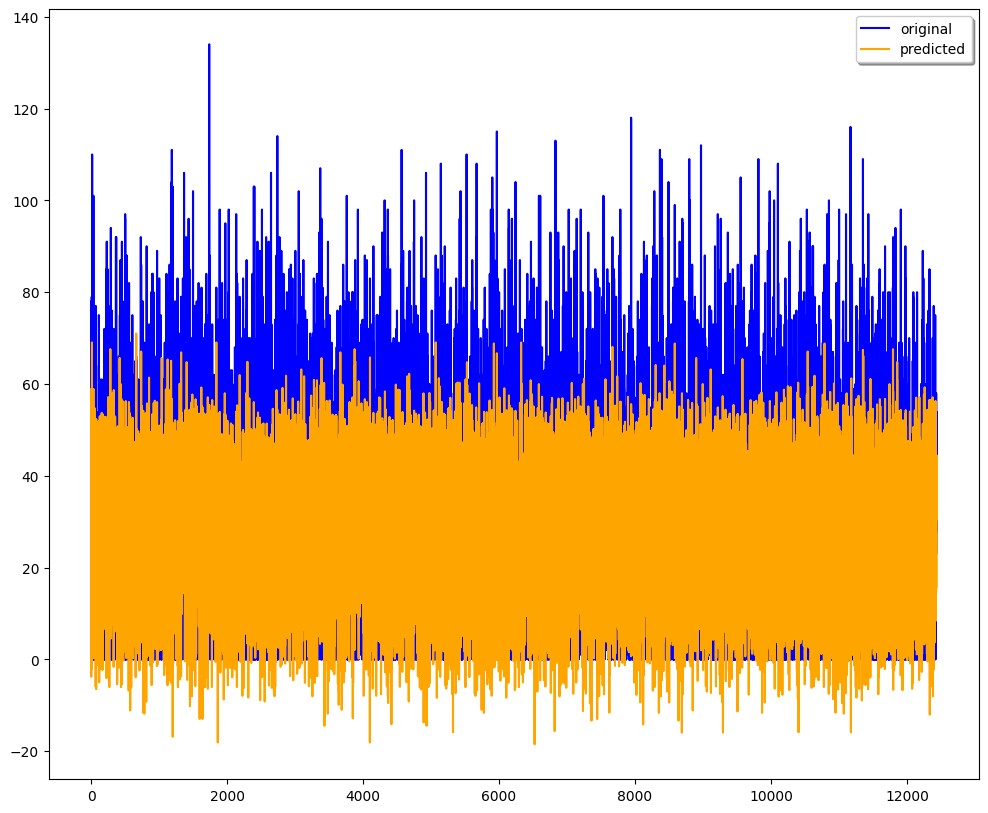

In [12]:
plt.figure(figsize=(12,10))
X = range(len(y_pred))
plt.plot(X, y_test, color='blue', label='original')
plt.plot(X, y_pred, color='orange', label='predicted')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show()

# Summary

In [13]:
res = pd.concat([m1, m2], ignore_index=True)
res.index = ['model1','model2']
res

,MSE,MAE,R2
model1,279.01143,12.996063,0.456004
model2,266.84419,12.435186,0.479726


To summarise the results, normalisation increased the $R^2$ score by 2% and reduced the errors.

However, we can see a lot of improvments, like the following:
* changing the loss function
* changing learning rate and penalty
* keep the `timestamp` column
* remove weakly correlated features

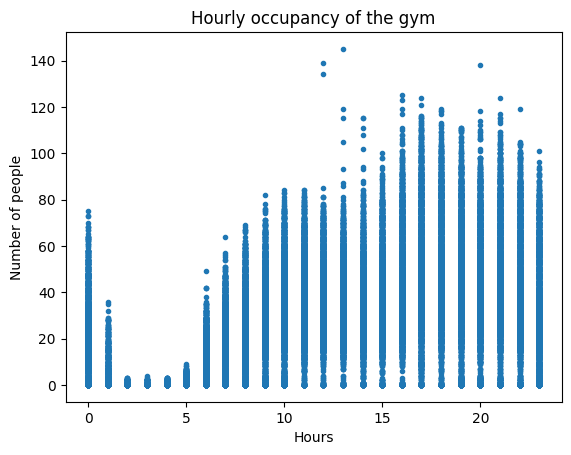

In [14]:
# hourly occupancy of the gym
plt.scatter(gym['hour'], gym['number_people'], marker='.')
plt.title('Hourly occupancy of the gym')
plt.ylabel('Number of people')
plt.xlabel('Hours')
plt.show()

The plot above shows us that least people going to the gym between 2AM and 5AM. So any day at 5AM seems like a safe bet.

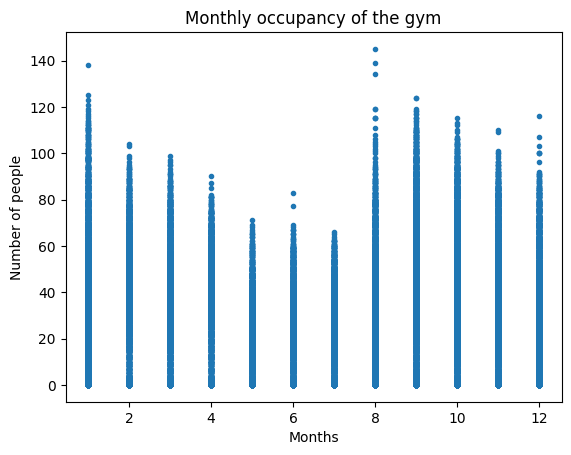

In [15]:
# monthly occupancy of the gym
plt.scatter(gym['month'], gym['number_people'], marker='.')
plt.title('Monthly occupancy of the gym')
plt.ylabel('Number of people')
plt.xlabel('Months')
plt.show()

The best months to start going to the gym is May, June and July.